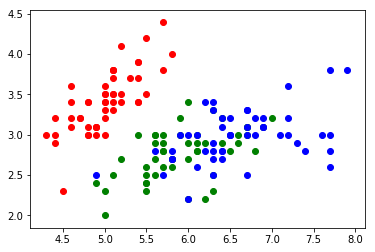

In [11]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import seaborn as sns
from numpy.linalg import norm
import time
from IPython.display import clear_output

#DATA
iris = datasets.load_iris()
X = iris["data"][:,:] #todos los atributos
y = (iris["target"]).astype(np.float64) #setosa, versicolor, virginica

def distancia(a,b):
    return np.sqrt(np.sum((a - b)**2))

def dbscan(X, epsilon):
    filas = X.shape[0]
    sus_clusters = np.full(filas,-1,dtype=int)
    cluster = -1
    #arreglo de 150x1, con -1s, -1 indica que no tiene cluster

    puntos_restantes = np.arange(filas)    

    #FOR
    while(puntos_restantes.shape[0]>0):
        cluster += 1
        
        # tomar punto aleatorio de los restantes (que tienen -1)
        punto_aleatorio_indexR = np.random.randint(0,puntos_restantes.shape[0])
        punto_aleatorio_indexX = puntos_restantes[punto_aleatorio_indexR]
        sus_clusters[punto_aleatorio_indexX] = cluster
        centroide = X[punto_aleatorio_indexX]
        i = np.argwhere(puntos_restantes == punto_aleatorio_indexX)
        puntos_restantes = np.delete(puntos_restantes,i)

        #hallar el punto más cercano y ver que esté en el círculo        
        #FOR
        intentar_anadir_a_cluster = True
        while(intentar_anadir_a_cluster and puntos_restantes.shape[0]>0):
            menor_distancia = 1000000
            punto_mas_cercano = X[puntos_restantes[0]]#solo para ámbito
            punto_mas_cercano_indexX = puntos_restantes[0]#solo para ámbito
            for p in puntos_restantes:
                if(distancia(centroide, X[p]) < menor_distancia):
                    punto_mas_cercano = X[p]
                    punto_mas_cercano_indexX = p
                    menor_distancia = distancia(centroide, X[p])
            if (distancia(punto_mas_cercano,centroide) <= epsilon):
                sus_clusters[punto_mas_cercano_indexX] = cluster
                centroide = punto_mas_cercano
                i = np.argwhere(puntos_restantes == punto_mas_cercano_indexX)
                puntos_restantes = np.delete(puntos_restantes,i)
            else:
                intentar_anadir_a_cluster = False
    return sus_clusters
    #print("cluster final, índice: ",cluster) #cluster0 , cluster1, cluster2
sus=dbscan(X,1.777)
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
fig, ax = plt.subplots()
plt.scatter()